In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, f1_score, auc, confusion_matrix

In [2]:
data=pd.read_csv('samples_cancer.csv')

In [3]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [11]:
data = data.drop("ID", axis=1)
data["BareNuc"] = pd.to_numeric(data["BareNuc"], errors="coerce")
data = data.dropna()
data["Class"]= data["Class"].map({2:0, 4:1})

In [12]:
x=data.drop("Class", axis=1)
y=data["Class"]

In [13]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [14]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [16]:
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)[:,1]

In [17]:
print("Confusion Matrix", confusion_matrix(y_test, y_pred))
print("Precision Score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("accuracy score", accuracy_score(y_test, y_pred))
print("f1 score", f1_score(y_test, y_pred))


Confusion Matrix [[78  1]
 [ 5 53]]
Precision Score 0.9814814814814815
recall_score 0.9137931034482759
accuracy score 0.9562043795620438
f1 score 0.9464285714285714


In [18]:
fpr,tpr,threshold=roc_curve(y_test, y_pred)
auc_score=auc(fpr,tpr)
print(auc_score)

0.9505674378000872


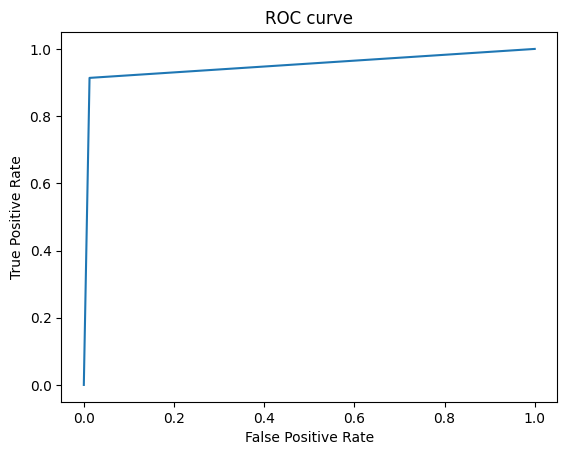

In [20]:
plt.plot(fpr,tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()